In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('depression_data.csv')

In [4]:
dataset.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [6]:
dataset.shape

(413768, 16)

In [7]:
dataset.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [8]:
import seaborn as sns

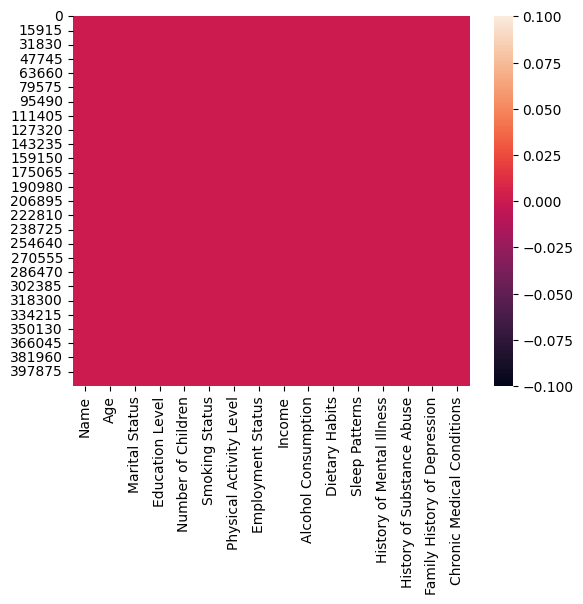

In [9]:
sns.heatmap(dataset.isnull())
plt.show()

In [10]:
dataset.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


<Axes: xlabel='Income'>

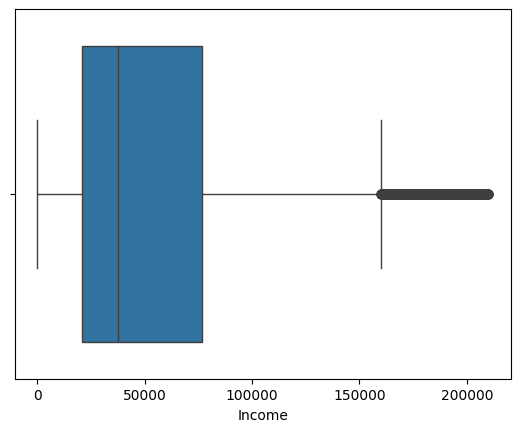

In [11]:
sns.boxplot(x="Income",data=dataset)

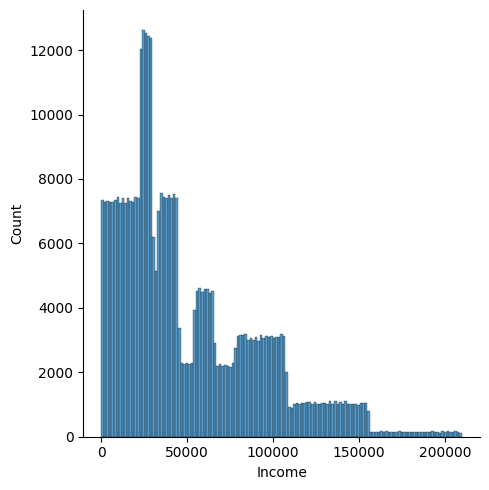

In [12]:
sns.displot(dataset["Income"])
plt.show()

In [13]:
dataset.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [14]:
dataset=dataset.drop(columns='Name',axis=1)

In [15]:
dataset['Marital Status'].unique()

array(['Married', 'Widowed', 'Divorced', 'Single'], dtype=object)

In [16]:
dataset['Education Level'].unique()

array(["Bachelor's Degree", 'High School', "Master's Degree",
       'Associate Degree', 'PhD'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [18]:
for i in dataset.select_dtypes(exclude=['float64,float32,int64,int32']).columns:
    dataset[i]=encoder.fit_transform(dataset[i])

In [19]:
dataset

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,13,1,1,2,2,0,1,138829,2,1,0,1,0,1,1
1,37,1,2,1,2,2,0,226270,0,2,0,1,0,0,1
2,60,3,3,1,2,2,0,378299,1,2,1,0,0,1,0
3,40,0,3,3,2,1,1,48046,2,1,2,0,0,0,0
4,0,2,2,0,2,2,1,41199,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,50,1,3,0,1,1,0,367251,1,0,1,0,0,0,0
413764,8,2,1,0,0,0,0,343253,1,0,2,1,1,0,1
413765,39,1,1,0,2,2,0,303758,2,1,0,0,0,1,1
413766,53,1,0,2,2,2,1,125041,2,1,2,0,1,0,0


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Age                           413768 non-null  int64
 1   Marital Status                413768 non-null  int32
 2   Education Level               413768 non-null  int32
 3   Number of Children            413768 non-null  int64
 4   Smoking Status                413768 non-null  int32
 5   Physical Activity Level       413768 non-null  int32
 6   Employment Status             413768 non-null  int32
 7   Income                        413768 non-null  int64
 8   Alcohol Consumption           413768 non-null  int32
 9   Dietary Habits                413768 non-null  int32
 10  Sleep Patterns                413768 non-null  int32
 11  History of Mental Illness     413768 non-null  int32
 12  History of Substance Abuse    413768 non-null  int32
 13  Family History

In [21]:
numeric_columns = dataset.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
corr = dataset[numeric_columns].corr()['Chronic Medical Conditions'].sort_values(ascending=False)	

In [22]:
corr

Chronic Medical Conditions      1.000000
Employment Status               0.042413
Sleep Patterns                  0.011549
History of Mental Illness       0.006038
History of Substance Abuse      0.003307
Marital Status                 -0.000261
Education Level                -0.000803
Family History of Depression   -0.002274
Number of Children             -0.006997
Alcohol Consumption            -0.012397
Dietary Habits                 -0.014439
Age                            -0.017625
Physical Activity Level        -0.030727
Income                         -0.034794
Smoking Status                 -0.041631
Name: Chronic Medical Conditions, dtype: float64

<Axes: >

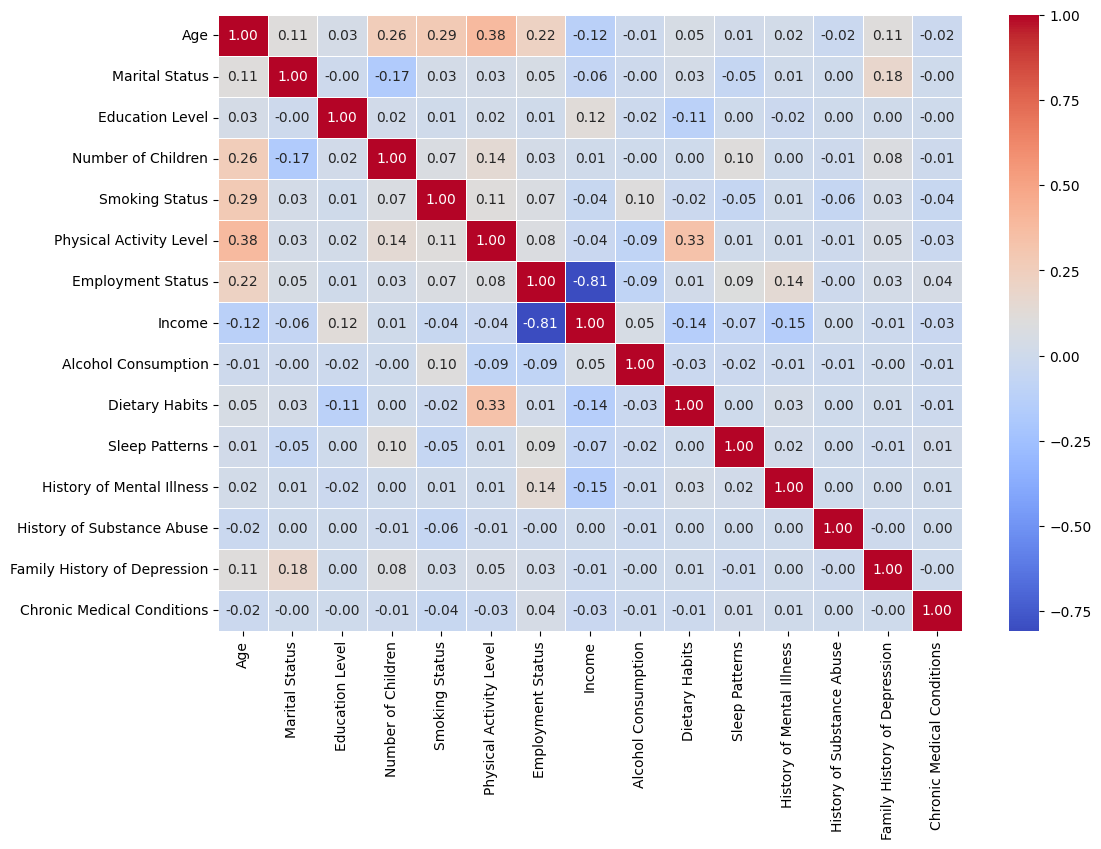

In [23]:
numeric_columns = dataset.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
corr1 = dataset[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [24]:
X=dataset.drop(columns='Chronic Medical Conditions',axis=1)
Y=dataset['Chronic Medical Conditions']

In [30]:
X

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
0,13,1,1,2,2,0,1,138829,2,1,0,1,0,1
1,37,1,2,1,2,2,0,226270,0,2,0,1,0,0
2,60,3,3,1,2,2,0,378299,1,2,1,0,0,1
3,40,0,3,3,2,1,1,48046,2,1,2,0,0,0
4,0,2,2,0,2,2,1,41199,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,50,1,3,0,1,1,0,367251,1,0,1,0,0,0
413764,8,2,1,0,0,0,0,343253,1,0,2,1,1,0
413765,39,1,1,0,2,2,0,303758,2,1,0,0,0,1
413766,53,1,0,2,2,2,1,125041,2,1,2,0,1,0


In [31]:
Y

0         1
1         1
2         0
3         0
4         1
         ..
413763    0
413764    1
413765    1
413766    0
413767    0
Name: Chronic Medical Conditions, Length: 413768, dtype: int32

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [26]:
models={
    "SVC":SVC(kernel='linear'),
    "Random Forest ":RandomForestClassifier(n_estimators=100,random_state=10),
    "Gradient boosting ":GradientBoostingClassifier(n_estimators=100),
    " Kneighbors ":KNeighborsClassifier(n_neighbors=10),
    "Logistic Regression ":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "XGB Classifier":XGBClassifier()
}

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
for model_name,model in models.items():
#     print(model_name ," : ",model)
    
    model.fit(X_train,Y_train)
    predictions=model.predict(X_test)
    accuracy=accuracy_score(Y_test,predictions)
    cm=confusion_matrix(Y_test,predictions)
    print(model_name ,"accuracy is  :",accuracy)
    print("confusion matrix ")
    print(np.array2string(cm,separator=', '))